## Préparation de données 

In [57]:
import sklearn
print('La version de sklearn :', sklearn.__version__)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

La version de sklearn : 1.0.1


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

In [59]:
from google.colab import files
uploaded = files.upload()

Saving velo2.xls to velo2 (1).xls


In [60]:
df = pd.read_excel("velo2.xls")

- Afficher df

In [61]:
df.head()

,station_id,name,type,num_docks_available,is_installed,date_installed,price,web,zdcld,zdcname,insee_code,municipality,line_id
0,5,CHELLES-GOURNAY,consigne,98,True,2012,20.0,https://veligo.transilien.com/fr/,68407,Chelles Gournay,77108,Chelles,C01730;C01729
1,9,CRETEIL-POMPADOUR,consigne,40,True,2016,20.0,https://veligo.transilien.com/fr/,69950,Créteil Pompadour,94028,Créteil,C01728
2,18,GRIGNY-CENTRE,consigne,40,True,2016,20.0,https://veligo.transilien.com/fr/,60797,Grigny Centre,91286,Grigny,C01728
3,34,RAMBOUILLET,consigne,40,True,2012,20.0,https://veligo.transilien.com/fr/,60665,Rambouillet,78517,Rambouillet,C01736
4,38,SAINT-DENIS-UNIVERSITE,consigne,32,True,2015,30.0,https://rouelibre.fr/,72358,Saint-Denis Université,93066,Saint-Denis,C01383


In [62]:
df.dtypes

station_id               int64
name                    object
type                    object
num_docks_available      int64
is_installed              bool
date_installed           int64
price                  float64
web                     object
zdcld                    int64
zdcname                 object
insee_code               int64
municipality            object
line_id                 object
dtype: object

In [63]:
df.isnull().sum()

station_id               0
name                     0
type                     0
num_docks_available      0
is_installed             0
date_installed           0
price                  945
web                      0
zdcld                    0
zdcname                  0
insee_code               0
municipality             0
line_id                  0
dtype: int64

suppression des colonnes extra

In [64]:
df=df.drop(['name','is_installed','date_installed','web','zdcname','insee_code','municipality'], axis=1)
df.head()
df.describe

<bound method NDFrame.describe of       station_id      type  num_docks_available  price  zdcld        line_id
0              5  consigne                   98   20.0  68407  C01730;C01729
1              9  consigne                   40   20.0  69950         C01728
2             18  consigne                   40   20.0  60797         C01728
3             34  consigne                   40   20.0  60665         C01736
4             38  consigne                   32   30.0  72358         C01383
...          ...       ...                  ...    ...    ...            ...
1864         644      abri                   16    0.0  66157         C01748
1865         661  consigne                   82   30.0  65897         C01739
1866         719      abri                   14    NaN  62890         C01743
1867         741      abri                   16    NaN  63025         C01743
1868         815      abri                   14    NaN  62851         C01743

[1869 rows x 6 columns]>

In [65]:
df.describe()

,station_id,num_docks_available,price,zdcld
count,1869.000000,1869.000000,924.000000,1869.000000
mean,248.741573,34.906367,20.159091,94834.985019
std,213.526731,41.817083,7.039250,99466.726842
min,2.000000,5.000000,0.000000,59761.000000
25%,78.000000,14.000000,20.000000,65227.000000
50%,176.000000,20.000000,20.000000,69786.000000
75%,372.000000,40.000000,20.000000,71785.000000
max,817.000000,398.000000,30.000000,478855.000000


**Imputation des données** : colonne NB_VALD 
& changement de type de str vers int 

In [66]:
df["price"].fillna(20, inplace = True)
df['price'] = df['price'].apply(int)

**Visualisation ** : affichage de tous les type d'abonnement existants pour procéder à l'encodage . 

In [67]:
df['type'].value_counts()

abri        994
consigne    875
Name: type, dtype: int64

In [68]:
for i in df.index:
    if df["type"][i]=="abri":
        df["type"][i]="0"
    else :
      df["type"][i]="1"
df['type'] = df['type'].apply(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
df['line_id'].value_counts()

C01742                         182
C01728                         154
C01727                         147
C01743                         140
C01739                         133
C01843                         126
C01378                          91
C01729                          91
NC                              77
C01740                          63
C01736                          63
C01737                          56
C01730                          49
C01736;C01741;C01727            49
C01740;C01742                   42
C01371                          35
C01731                          35
C01742;C01729                   28
C01390                          28
C01737;C01727                   28
C01377                          21
C01739;C01740;C01742            21
C01727;C01774                   14
C01738;C01743;C01843            14
C01743;C01727                   14
C01748                          14
C01740;C01727                   14
C01379                          14
C01730;C01729       

**Visualisation**

In [70]:
df.head()

,station_id,type,num_docks_available,price,zdcld,line_id
0,5,1,98,20,68407,C01730;C01729
1,9,1,40,20,69950,C01728
2,18,1,40,20,60797,C01728
3,34,1,40,20,60665,C01736
4,38,1,32,30,72358,C01383


In [71]:
df=df.drop(['line_id'], axis=1)
df.head()

,station_id,type,num_docks_available,price,zdcld
0,5,1,98,20,68407
1,9,1,40,20,69950
2,18,1,40,20,60797
3,34,1,40,20,60665
4,38,1,32,30,72358


In [72]:
df.describe()

,station_id,type,num_docks_available,price,zdcld
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,248.741573,0.468165,34.906367,20.078652,94834.985019
std,213.526731,0.499119,41.817083,4.948744,99466.726842
min,2.000000,0.000000,5.000000,0.000000,59761.000000
25%,78.000000,0.000000,14.000000,20.000000,65227.000000
50%,176.000000,0.000000,20.000000,20.000000,69786.000000
75%,372.000000,1.000000,40.000000,20.000000,71785.000000
max,817.000000,1.000000,398.000000,30.000000,478855.000000


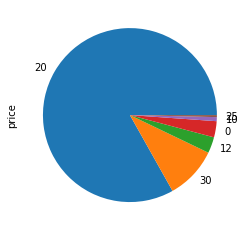

In [74]:
df['price'].value_counts().plot.pie()
plt.show()

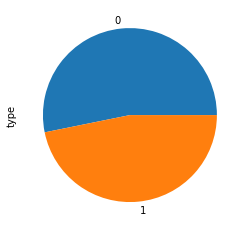

In [75]:
df['type'].value_counts().plot.pie()
plt.show()

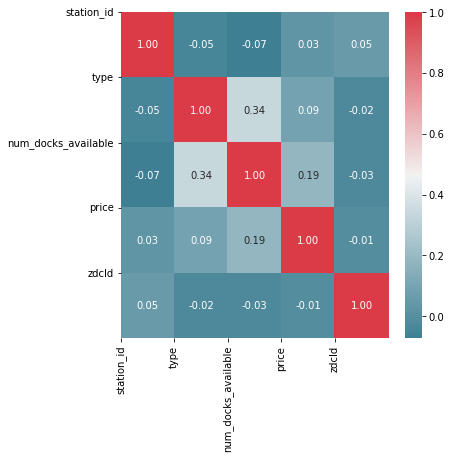

In [76]:
import seaborn as sns
#graphique - croisement deux à deux des variables
#Create Correlation matrix
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(6,6))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

Conversion des types 

Séparation des données : sans labels et labels 

In [77]:
X = df.drop(['type'], axis=1)
y = df['type']

In [78]:
X.describe

<bound method NDFrame.describe of       station_id  num_docks_available  price  zdcld
0              5                   98     20  68407
1              9                   40     20  69950
2             18                   40     20  60797
3             34                   40     20  60665
4             38                   32     30  72358
...          ...                  ...    ...    ...
1864         644                   16      0  66157
1865         661                   82     30  65897
1866         719                   14     20  62890
1867         741                   16     20  63025
1868         815                   14     20  62851

[1869 rows x 4 columns]>

In [79]:
y.describe()


count    1869.000000
mean        0.468165
std         0.499119
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: type, dtype: float64

Séparation des données d'apprentissage et des données de test : choix de 20% 80%

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.2)

In [81]:
X_train

,station_id,num_docks_available,price,zdcld
396,160,24,20,70640
965,24,40,20,70515
1365,240,20,20,60987
1804,564,24,20,70033
944,336,12,20,67658
...,...,...,...,...
1425,515,20,0,72787
343,226,28,20,72652
192,221,12,20,424094
899,625,60,20,64514


In [82]:
y_train

396     0
965     1
1365    1
1804    0
944     1
       ..
1425    1
343     1
192     0
899     0
418     1
Name: type, Length: 1495, dtype: int64

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,20))# Par défaut c'est 30
n_neighbors = list(range(1,25))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=-1)
#n_jobs: number of CPU'sfor execution.
#cv: number of folds of the cross validation

#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


Hyperparametrs avec KNN 

In [84]:
best_parameters = clf.best_params_
print(best_parameters)

{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}


In [85]:
best_result = clf.best_score_
print(best_result)

1.0


Application du modèle KNN

In [109]:
knn = KNeighborsClassifier(6,p=1,leaf_size=1 )
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [110]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.94


In [111]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[203   0]
 [ 24 147]]


In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       203
           1       1.00      0.86      0.92       171

    accuracy                           0.94       374
   macro avg       0.95      0.93      0.93       374
weighted avg       0.94      0.94      0.94       374



**Profiling**

Une des variables pertinentes est : 
1/code stif reseau : pour les valeurs supérieures à 800 le traffic journalier ne peut etre que bas(1) . 
2/ catégorie titre qui est le type d'abonnement : pour les types 0,1,2 : on est certain qu'il s'agit d'un traffic journalier bas(1). s'il s'agit du type 5 : le traffic est élevé(2) .

**Conclusion :** s'il s'agit d'un code reseau>800 et un type de carte TST, FGT ou le reste des carte min (cad types 0,1,2) il s'agit forcement d'un traffic journalier bas.

Le reste des variables et des résultats est globalement inconcluant. 


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
df.boxplot(column="CODE_STIF_RES",by="NB_VALD")
#Histogramme
df.hist(column="CODE_STIF_RES",by="NB_VALD",bins=30)

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
df.boxplot(column="CATEGORIE_TITRE",by="NB_VALD")
#Histogramme
df.hist(column="CATEGORIE_TITRE",by="NB_VALD",bins=30)

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="NB_VALD")

In [ ]:
import seaborn as sns
#graphique - croisement deux à deux des variables
#Create Correlation matrix
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(6,6))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()